In [2]:
# packages
import sys
import numpy as np
import pandas as pd
import os

import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", pd.errors.SettingWithCopyWarning)

In [66]:
user='ad1803' # Username on GADI - if you are storing on /scratch/nf33/user
base_dir=f"/scratch/nf33/{user}/hk25-AusCyclones"
case_dir=f"{base_dir}/ETC_workfolder/ETCs_Climatology_HRes/ETC_UM_oro_test"
out_dir=f"{case_dir}/stitchNodes"
out_file=f"{out_dir}/stitchNodes.csv"

In [120]:
# directory for TempestExtremes
os.environ['TEMPESTEXTREMESDIR']='/scratch/nf33/tempestextremes/bin'
# link to self-written packages
sys.path.append(base_dir) # change to your directory
from utils.plotting import plot_track, calcu_track_den, lon180to360, plot_den

In [68]:
# tropical cyclone
column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "zs"]
dftc = pd.read_csv(out_file, names=column_names, skiprows=[0],low_memory=False)

#### Read in process as above for ERA data, filter to 2020

In [96]:
# Read in yearly data
data_ERA =f'/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_ERA5/Data/stitchNodes/stitchNodes.csv'

column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "zs"]
dftc_ERA = pd.read_csv(data_ERA, names=column_names, skiprows=[0],low_memory=False)

#Use only ERA5 Feb 2020 to Feb 2021 Data

# Filter between Feb 2020 and Feb 2021
df_filt_ERA_time = dftc_ERA[
    ((dftc_ERA['year'] == 2020) & (dftc_ERA['month'] >= 2)) |
    ((dftc_ERA['year'] == 2021) & (dftc_ERA['month'] <= 2))
].reset_index(drop=True)


#### Read in process as above for ICON data

In [131]:
# Read in yearly data
data_ICON =f'/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_ICON/ETC_UM_ICON/stitchNodes/stitchNodes.csv'
column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "zs"]
dftc_ICON = pd.read_csv(data_ICON, names=column_names, skiprows=[0],low_memory=False)

**Visualization 1**  
`plot_track`(df, track_color, fig_title)  
plot tracks  

Parameters:
- **df** - cyclone tracks dataframe (pandas dataframe)
- **track_color** - track color (string)
- **fig_title** - figure title (string)

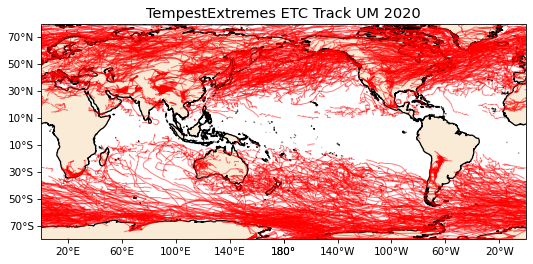

In [143]:
fig = plot_track(dftc, 'red', 'TempestExtremes ETC Track UM 2020')

**Visualization 2**  
`calcu_track_den`(min_lon, max_lon, min_lat, min_lat, max_lat, delta, df_track, storm_id_field, grid_id_field, lonname, latname)  
calculate track density from cyclone tracks  

Parameters:
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **delta** - horizontal grid spacing
- **df_track** - cyclone tracks dataframe (pandas dataframe)
- **storm_id_field** - cyclone track ID number (string)
- **grid_id_field** - "grid_id_field" default
- **lonname** - name of longitude of cyclone track (string)
- **latname** - name of latitude of cyclone track (string)

In [121]:
#UM Process
dftc['lon'] = [lon180to360(lon) for lon in dftc['lon']]
# dstc = calcu_track_den(0, 360, -80, 80, 1, dftc.where(np.logical_and(dftc.year==2021, dftc.month==1)), 'track_id', 'gridid', 'lon', 'lat')
dstc = calcu_track_den(0, 360, -80, 80, 1, dftc, 'track_id', 'gridid', 'lon', 'lat')

In [122]:
#ERA Process
df_filt_ERA_time['lon'] = [lon180to360(lon) for lon in df_filt_ERA_time['lon']]
dstc_ERA = calcu_track_den(0, 360, -80, 80, 1, df_filt_ERA_time, 'track_id', 'gridid', 'lon', 'lat')

In [132]:
#ICON Process
dftc_ICON['lon'] = [lon180to360(lon) for lon in dftc_ICON['lon']]
dstc_ICON = calcu_track_den(0, 360, -80, 80, 1, dftc_ICON, 'track_id', 'gridid', 'lon', 'lat')

**Visualization 3**  
`plot_den`(dataArray, minlon, maxlon, minlat, maxlat, count_range, sigma, mycmap, title)  
plot track density

Parameters:
- **dataArray** - 2-D density array (xrarry data array)
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **count_range** - colorbar levels (numpy array)
- **sigma** - degree of smooth (1~5)
- **mycmap** - name of longitude of cyclone track (string)
- **title** - figure title (string)

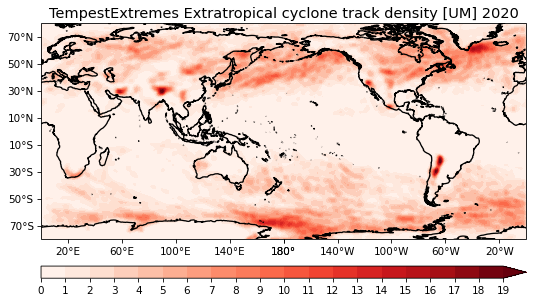

In [95]:
fig = plot_den(dstc['number'], 0, 360, -80, 80, np.arange(0, 20, 1), 1, 'Reds', 'TempestExtremes Extratropical cyclone track density [UM] 2020')

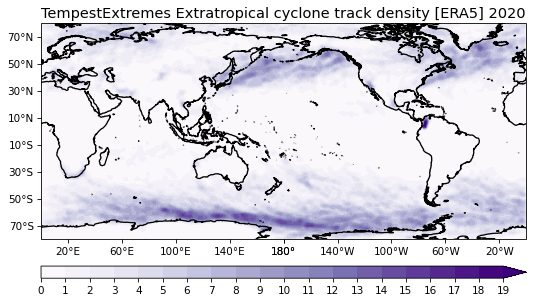

In [142]:
fig = plot_den(dstc_ERA['number'], 0, 360, -80, 80, np.arange(0, 20, 1), 1, 'Purples', 'TempestExtremes Extratropical cyclone track density [ERA5] 2020')

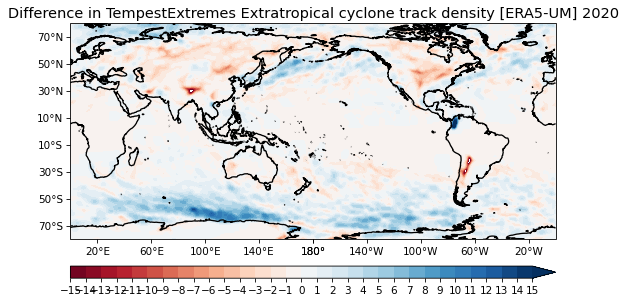

In [123]:
fig = plot_den(dstc_ERA['number']-dstc['number'], 0, 360, -80, 80, np.arange(-15, 16, 1), 1, 'RdBu', 'Difference in TempestExtremes Extratropical cyclone track density [ERA5-UM] 2020')

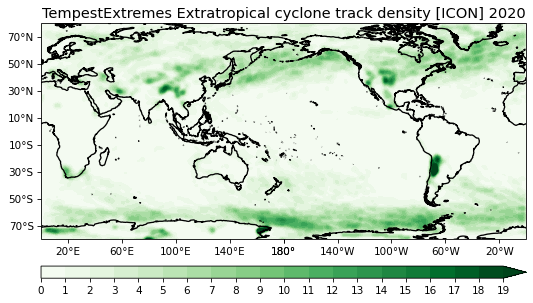

In [137]:
fig = plot_den(dstc_ICON['number'], 0, 360, -80, 80, np.arange(0, 20, 1), 1, 'Greens', 'TempestExtremes Extratropical cyclone track density [ICON] 2020')

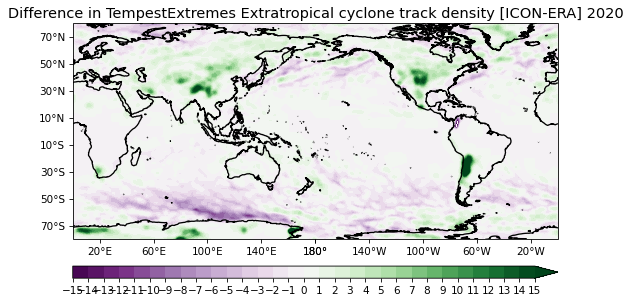

In [141]:
fig = plot_den(dstc_ICON['number']-dstc_ERA['number'], 0, 360, -80, 80, np.arange(-15, 16, 1), 1, 'PRGn', 'Difference in TempestExtremes Extratropical cyclone track density [ICON-ERA] 2020')